In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [105]:
X,y=make_moons(n_samples=1000, noise=0.2)
X_train,X_test,y_train,y_test = train_test_split(X,y)

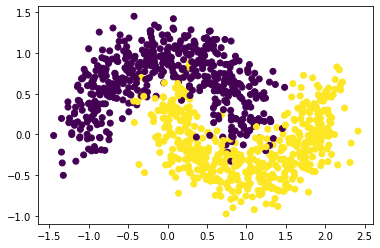

In [106]:
plt.scatter(X[:,0],X[:,1],c=y);

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier,RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [108]:
model_1=DecisionTreeClassifier(random_state=0)
model_2=SGDClassifier(random_state=0)
model_3=KNeighborsClassifier(n_neighbors=2)
model_4=VotingClassifier([('DecisionTreeClassifier',model_1),('SGD',model_2),('KNN',model_3)], voting='hard')
model_5=BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=100)
model_6=RandomForestClassifier(n_estimators=100)
model_7=AdaBoostClassifier(n_estimators=100)
model_8=GradientBoostingClassifier(n_estimators=100)
model_9=StackingClassifier([('DecisionTreeClassifier',model_1),('SGD',model_2),('KNN',model_3)], final_estimator=KNeighborsClassifier())


In [109]:
for model in (model_1,model_2,model_3, model_4,model_5,model_6,model_7,model_8, model_9):
    model.fit(X_train,y_train)
    print(model.__class__.__name__,model.score(X_test,y_test))

DecisionTreeClassifier 0.94
SGDClassifier 0.872
KNeighborsClassifier 0.952
VotingClassifier 0.968
BaggingClassifier 0.972
RandomForestClassifier 0.964
AdaBoostClassifier 0.96
GradientBoostingClassifier 0.964
StackingClassifier 0.96
